# 1 pandas 数据结构

## 1.1 series 一维数组 

### 1.1.1 创建

#### 1.1.1.1 生成series对象

In [13]:
import pandas as pd
s = pd.Series(data=[1, 2, 3], index=['red', 'yellow', 'blue'])# data 可以是字典、numpy 里的 ndarray 对象等。index 是数据索引.
print(s)

red       1
yellow    2
blue      3
dtype: int64


#### 1.1.1.2 dict to Series

In [18]:
dic = {'a':1, 'b':2, 'c':3}
s = pd.Series(dic)
print(s)

a    1
b    2
c    3
dtype: int64


#### 1.1.1.3 ndarray to Series


In [19]:
import numpy as np
ndarray = np.random.randn(5)
index = ['a', 'b', 'c', 'd', 'e']
s = pd.Series(data=ndarray, index=index)
print(s)

a   -0.772543
b   -1.122858
c    0.143315
d   -1.125881
e    0.666532
dtype: float64


## 1.2 DataFrame 二维数组 

### 1.2.1 创建

#### 1.2.1.1 Series 字典 to DataFrame

In [20]:
# coding:utf-8
import pandas as pd
series_dict = {'one': pd.Series(data=[1, 2, 3], index=['a', 'b', 'c']), 'two':pd.Series(data=[1, 2, 3, 4], index=['a','b','c','d'])}
data_frame = pd.DataFrame(series_dict)
print(data_frame)

   one  two
a  1.0    1
b  2.0    2
c  3.0    3
d  NaN    4


#### 1.2.1.2 字典组成的列表 to DataFrame

In [21]:
# coding:utf-8
import pandas as pd
# 带字典的列表
d = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
df = pd.DataFrame(d)
print(df)

   a   b     c
0  1   2   NaN
1  5  10  20.0


#### 1.2.1.3 DataFrame.from_ 方法
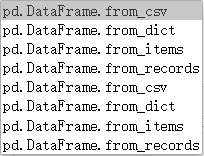

In [26]:
# 如下所示
dict_list = [('A', [1, 2, 3]), ('B', [4, 5, 6])]
c = ['one', 'two', 'three']
d = pd.DataFrame.from_dict(dict(dict_list))
print(d)


   A  B
0  1  4
1  2  5
2  3  6
